In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
# import mpld3
# mpld3.enable_notebook()
def increase_size_by(N, fontsize, plt):
    params = plt.gcf()
    axes = params.get_axes()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*N, plSize[1]*N) )
    for ax in axes:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fontsize)


In [2]:
genome = "1265628.3"
virsorter = True

In [3]:
dfa = pd.read_csv('/home/hielke/bep/combined_data/all.filtered.spacers', header=None, sep='\t', 
                  names=['genome', 'spacer', 's', 'e', 'continueig', 'len', 'ident', 'sum_spacers', 'phage_id', 'has_phages'])
dfa = dfa.query('genome == @genome')
pd.set_option('display.max_rows', 500)
dfa

,genome,spacer,s,e,continueig,len,ident,sum_spacers,phage_id,has_phages
18102,1265628.3,CARW01000044_1_2,110344,110313,CARW01000044,32,100.00,37,0,1
18103,1265628.3,CARW01000044_1_2,110405,110374,CARW01000044,32,100.00,37,0,1
18104,1265628.3,CARW01000044_1_2,110463,110435,CARW01000044,32,90.62,37,0,1
18105,1265628.3,CARW01000044_1_3,110344,110313,CARW01000044,32,100.00,37,0,1
18106,1265628.3,CARW01000044_1_3,110405,110374,CARW01000044,32,100.00,37,0,1
18107,1265628.3,CARW01000044_1_3,110463,110435,CARW01000044,32,90.62,37,0,1
18108,1265628.3,CARW01000044_1_5,110344,110313,CARW01000044,32,100.00,37,0,1
18109,1265628.3,CARW01000044_1_5,110405,110374,CARW01000044,32,100.00,37,0,1
18110,1265628.3,CARW01000044_1_5,110463,110435,CARW01000044,32,90.62,37,0,1
18111,1265628.3,CARW01000044_1_6,110344,110313,CARW01000044,32,100.00,37,0,1


In [4]:
dit = sum(dfa['phage_id'].map(lambda x: x != 0))
print(dit)

0


In [5]:
dfo = pd.read_csv('/home/hielke/bep/combined_data/all.filtered.spacers', sep='\t', dtype={'genome': str}, 
                  names=["genome", "spacer", "s", "e", "contig", "l", "ident", "spacers", "what_phage", "has_phage"], header=None)
dfo

,genome,spacer,s,e,contig,l,ident,spacers,what_phage,has_phage
0,100053.4,JQGS01000134_1_1,496,464,JQGS01000250,33,100.00,40,-1,-1
1,100053.4,JQGS01000134_1_1,207,176,JQGS01000250,33,90.91,40,-1,-1
2,100053.4,JQGS01000134_1_1,261,230,JQGS01000250,33,87.87,40,-1,-1
3,100053.4,JQGS01000134_1_1,459,428,JQGS01000250,33,84.85,40,-1,-1
4,100053.4,JQGS01000134_1_1,351,320,JQGS01000250,33,81.82,40,-1,-1
5,100053.4,JQGS01000134_1_1,315,284,JQGS01000250,33,78.79,40,-1,-1
6,100053.4,JQGS01000134_1_1,369,338,JQGS01000250,33,78.79,40,-1,-1
7,100053.4,JQGS01000134_1_1,279,248,JQGS01000250,33,75.75,40,-1,-1
8,100053.4,JQGS01000134_1_1,531,500,JQGS01000250,33,75.75,40,-1,-1
9,100053.4,JQGS01000134_1_1,603,572,JQGS01000250,33,75.75,40,-1,-1


In [6]:
dfoa = dfo.query("genome == @genome")
orientation = dfoa.apply(lambda r: 0 < r['s'] - r['e'], axis=1)
print(sum(orientation) / len(orientation))

1.0


In [7]:
print(orientation)

18102    True
18103    True
18104    True
18105    True
18106    True
18107    True
18108    True
18109    True
18110    True
18111    True
18112    True
18113    True
18114    True
18115    True
18116    True
dtype: bool


In [8]:
dfog = dfo.query('genome ==  @genome & ident == 100')
dfcont = pd.read_csv("/home/hielke/bep/data/out_contig_len/" + genome + ".fna.len", header=None, names=["contig", "len", "cumsum"], sep='\t')
start_dict = dfcont.set_index('contig')['cumsum'].to_dict()
len_dict = dfcont.set_index('contig')['len'].to_dict()
dfog['start_genome'] = dfog.apply(lambda x: x['s'] + start_dict[x['contig']], axis=1)

/home/hielke/py/miniconda3/envs/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
from operator import itemgetter
max_contig, start_max = max(start_dict.items(), key=itemgetter(1))
max_length = start_max + len_dict[max_contig]
print(start_max)
print(max_length)

4706298
4738196


In [10]:
dfv = pd.read_csv("/home/hielke/bep/combined_data/phages.coords.tsv", sep='\t', names=['genome', 'contig', 'type', 'range'], dtype={'genome': str}, header=None)
dfv[dfv['genome'] == genome]

,genome,contig,type,range
32348,1265628.3,CARW01000204,2,NaN
32349,1265628.3,CARW01000222,2,966-31736
32350,1265628.3,CARW01000035,3,13674-20937
32351,1265628.3,CARW01000211,3,NaN
32352,1265628.3,CARW01000033,4,37307-50061
32353,1265628.3,CARW01000006,5,43383-81259
32354,1265628.3,CARW01000052,5,39568-69966


In [11]:
dfvg = dfv.query('genome == @genome')
virsorter_coords = dfvg.apply(lambda x: (start_dict[x['contig']], start_dict[x['contig']] + len_dict[x['contig']]) if x['range'] is np.nan else 
#                print("banaan"), axis=1)
          (start_dict[x['contig']] + int(x['range'].split('-')[0]), start_dict[x['contig']] + int(x['range'].split('-')[1])), axis=1)
# A = dfvg.apply(lambda x: (start_dict[x['contig']], start_dict[x['contig']] + len_dict[x['contig']]), axis=1)


In [12]:
virsorter_coords

32348    (4524409, 4526883)
32349    (4707264, 4738034)
32350    (1488072, 1495335)
32351    (4559610, 4568230)
32352    (1459796, 1472550)
32353      (358999, 396875)
32354    (2631361, 2661759)
dtype: object

In [13]:
dfvg

,genome,contig,type,range
32348,1265628.3,CARW01000204,2,NaN
32349,1265628.3,CARW01000222,2,966-31736
32350,1265628.3,CARW01000035,3,13674-20937
32351,1265628.3,CARW01000211,3,NaN
32352,1265628.3,CARW01000033,4,37307-50061
32353,1265628.3,CARW01000006,5,43383-81259
32354,1265628.3,CARW01000052,5,39568-69966


In [14]:
if virsorter:
    total_len = dfcont.iloc[-1]['len'] + dfcont.iloc[-1]['cumsum']
    total_vir = sum([e - s for s, e in virsorter_coords])
    print("%.2f %% of the genome is phage DNA" % ((total_vir / total_len) * 100))
    print("%.2f %% of the selfhits are located at phage DNA" % (sum(map(bool, dfog['what_phage'] / len(dfog)))))

2.75 % of the genome is phage DNA
0.00 % of the selfhits are located at phage DNA


In [15]:
if False:
    B = set(dfog['spacer'])
    print("$|".join(B))
    print(len(B))


In [16]:
if False:
    A = {'LFBV01000005_2_3', 'LFBV01000005_2_6', 'LFBV01000010_2_11', 'LFBV01000001_6_1', 'LFBV01000010_1_6', 'LFBV01000013_1_1', 'LFBV01000005_2_5', 'LFBV01000001_8_2', 'LFBV01000001_6_3', 'LFBV01000001_8_4', 'LFBV01000001_8_3', 'LFBV01000001_8_1', 'LFBV01000010_2_6', 'LFBV01000005_2_4', 'LFBV01000005_2_2', 'LFBV01000001_5_3', 'LFBV01000010_5_2', 'LFBV01000001_8_6', 'LFBV01000001_5_1', 'LFBV01000010_1_2', 'LFBV01000001_6_2', 'LFBV01000010_2_5', 'LFBV01000001_7_2', 'LFBV01000001_7_3', 'LFBV01000001_7_4', 'LFBV01000001_7_1', 'LFBV01000001_5_2', 'LFBV01000010_4_13', 'LFBV01000001_8_5'}
    print(B - A)

In [17]:
if False: dfog.to_csv("hits/" + genome + ".hits.tsv", index=False, sep='\t')

In [18]:
dfog

,genome,spacer,s,e,contig,l,ident,spacers,what_phage,has_phage,start_genome
18102,1265628.3,CARW01000044_1_2,110344,110313,CARW01000044,32,100.0,37,0,1,2291197
18103,1265628.3,CARW01000044_1_2,110405,110374,CARW01000044,32,100.0,37,0,1,2291258
18105,1265628.3,CARW01000044_1_3,110344,110313,CARW01000044,32,100.0,37,0,1,2291197
18106,1265628.3,CARW01000044_1_3,110405,110374,CARW01000044,32,100.0,37,0,1,2291258
18108,1265628.3,CARW01000044_1_5,110344,110313,CARW01000044,32,100.0,37,0,1,2291197
18109,1265628.3,CARW01000044_1_5,110405,110374,CARW01000044,32,100.0,37,0,1,2291258
18111,1265628.3,CARW01000044_1_6,110344,110313,CARW01000044,32,100.0,37,0,1,2291197
18112,1265628.3,CARW01000044_1_6,110405,110374,CARW01000044,32,100.0,37,0,1,2291258
18114,1265628.3,CARW01000044_1_8,110344,110313,CARW01000044,32,100.0,37,0,1,2291197
18115,1265628.3,CARW01000044_1_8,110405,110374,CARW01000044,32,100.0,37,0,1,2291258


hi


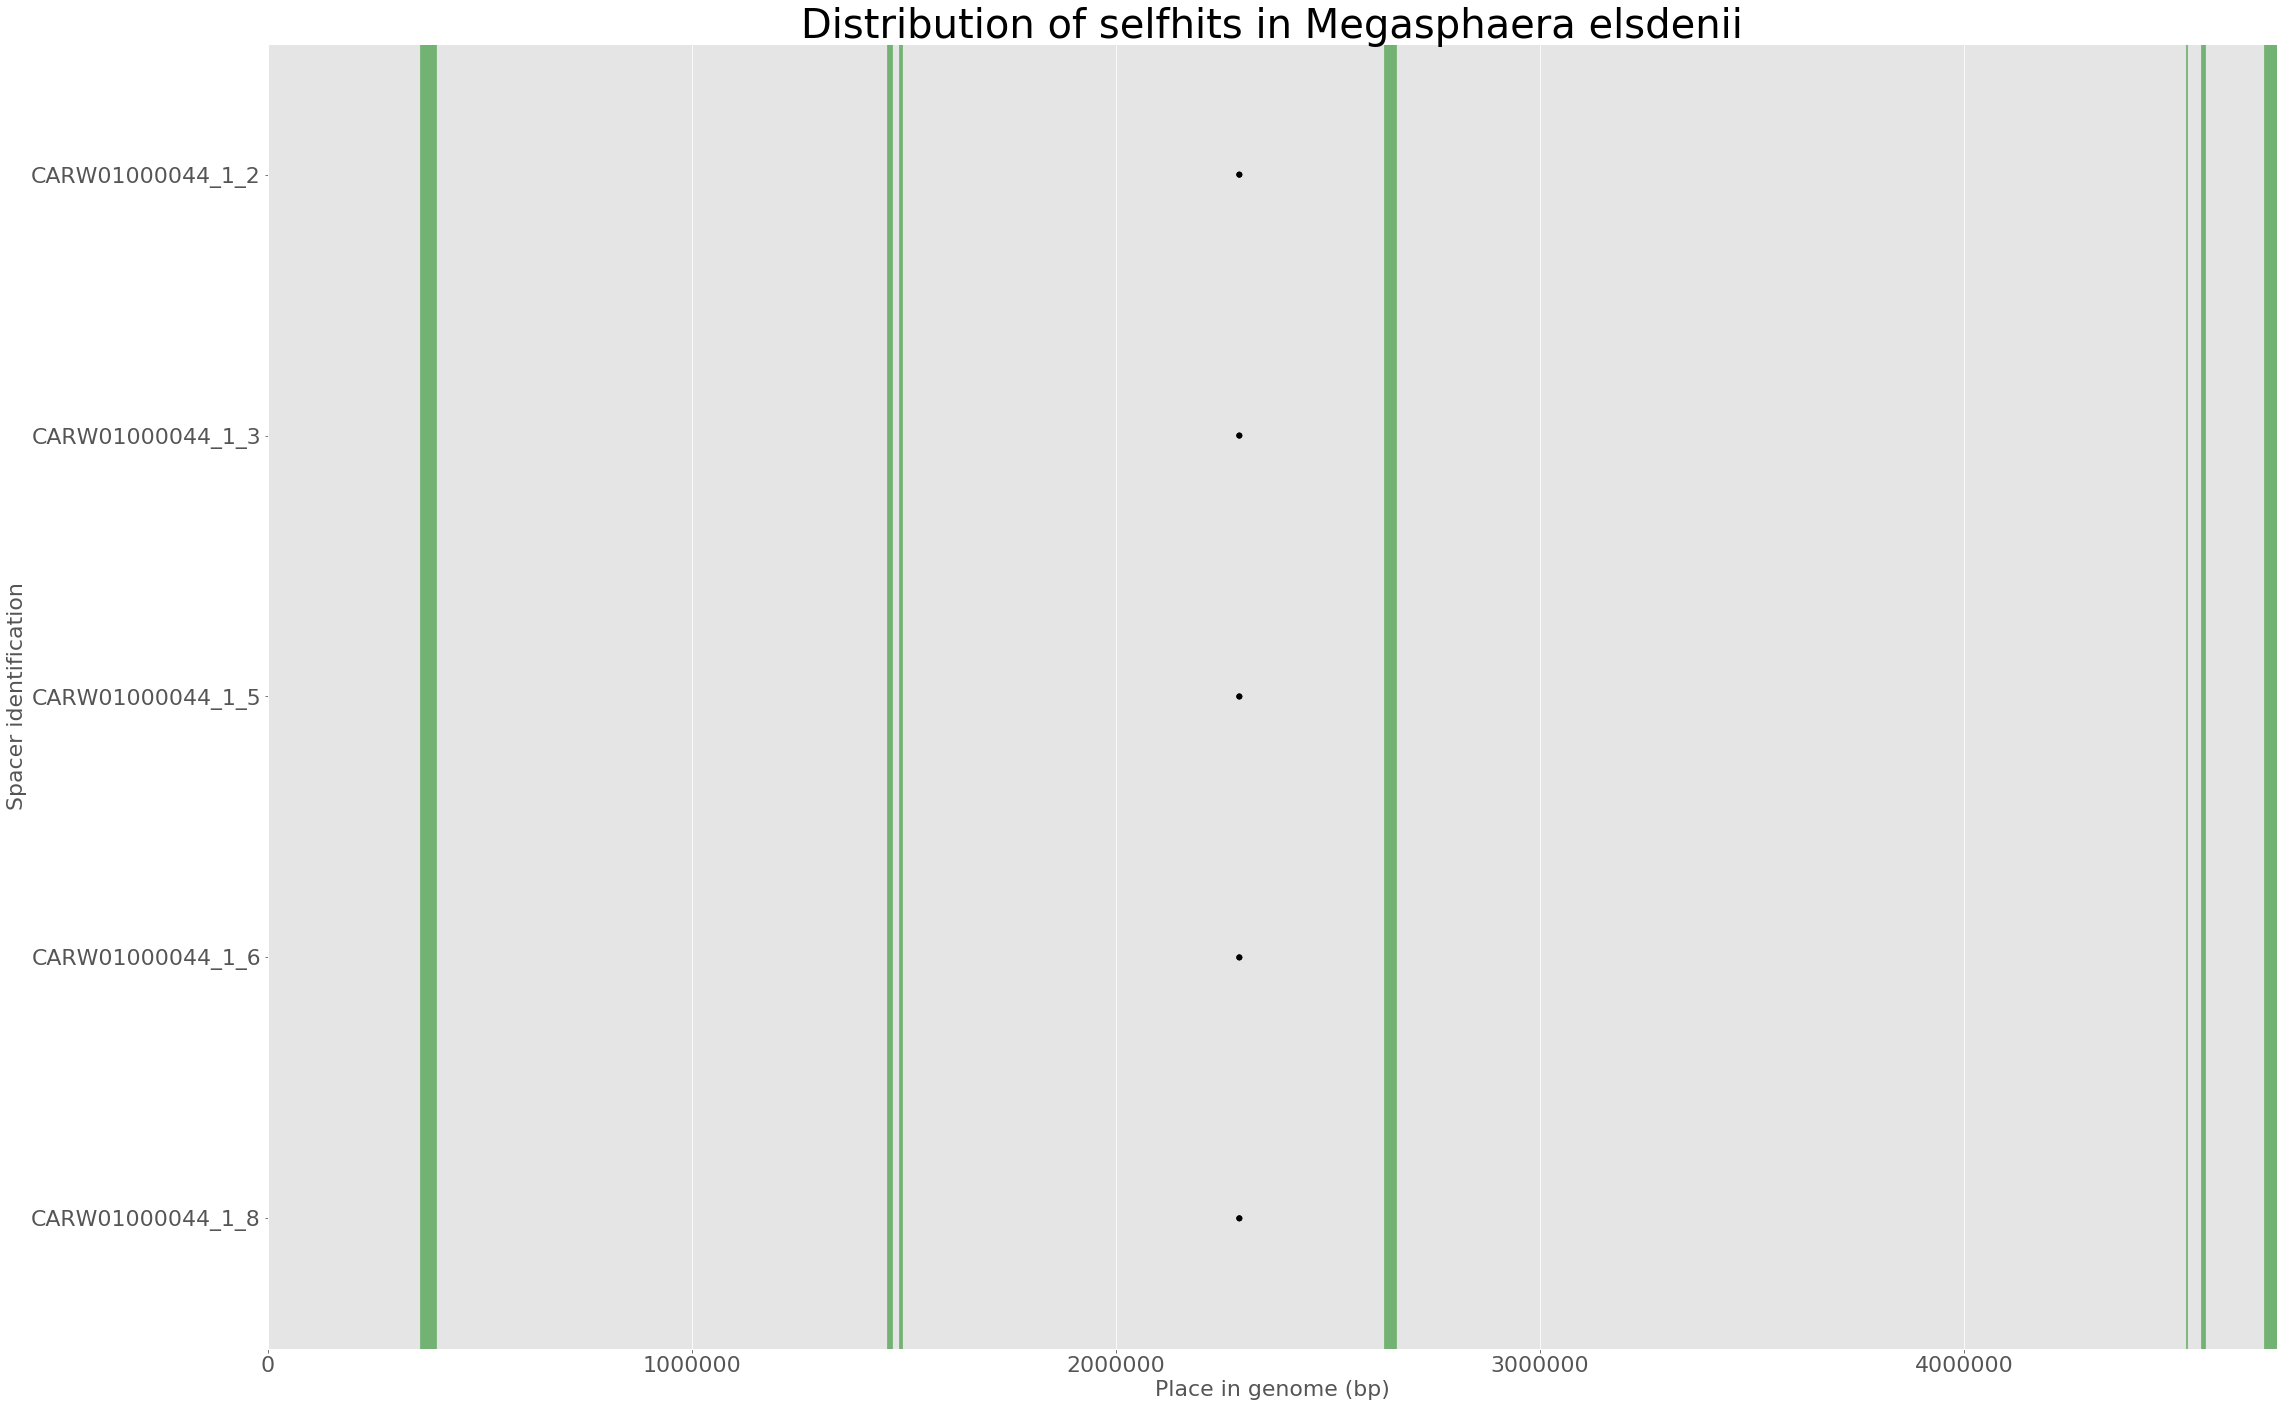

In [19]:
ax = sns.stripplot(data=dfog, x='start_genome', jitter=0, size=6, y='spacer', color='black')
increase_size_by(6, 22, plt)
# import matplotlib.transforms as mtransforms
# trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
if virsorter:
    print('hi')
    for span in virsorter_coords:
        ax.axvspan(span[0], span[1], alpha=.5, color='green')
# plt.savefig("place_of_hits_" + genome + ".png", format='png', bbox_inches='tight')
plt.xlim((1, max_length))
plt.title("Distribution of selfhits in Megasphaera elsdenii", size=40)
plt.xlabel("Place in genome (bp)")
plt.ylabel("Spacer identification")
plt.savefig("/home/hielke/bep/jups/bep_figs/%s.png" % genome, format='png', bbox_inches='tight')